Estos datos fueron previamente utilizados en el experimento de psicología cognitiv y representan diferentes condiciones de un experimento.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from io import StringIO
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

## Obtener datos

In [2]:
df = pd.read_csv('globos.csv')
df.head()

,YELLOW,SMALL,STRETCH,ADULT,T
0,YELLOW,SMALL,STRETCH,CHILD,T
1,YELLOW,SMALL,DIP,ADULT,T
2,YELLOW,SMALL,DIP,CHILD,F
3,YELLOW,SMALL,DIP,CHILD,F
4,YELLOW,LARGE,STRETCH,ADULT,T


## Procesar datos

Ya que el modelo solo acepta valores numéricos y el dataset contiene valores nominales es necesario antes del entrenamiento encodear los valores para que tengan un valor numérico.

In [3]:
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,YELLOW,SMALL,STRETCH,ADULT,T
0,1,1,1,1,1
1,1,1,0,0,1
2,1,1,0,1,0
3,1,1,0,1,0
4,1,0,1,0,1


### Obtener subconjunto de atributos

In [4]:
data=df.values[:,:4]
data
data_columns = list(df.columns.values[:4])

### Obtener subconjunto de clases

In [5]:
target=df.values[:,4]

## Crear conjuntos de entrenamiento y prueba

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=8)

## Entrenar modelo

In [7]:
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

## Comprobar las predicciones

In [8]:
print('Las prediccion son un: ', metrics.accuracy_score(y_test, y_pred)*100, '% certeras')

Las prediccion son un:  100.0 % certeras


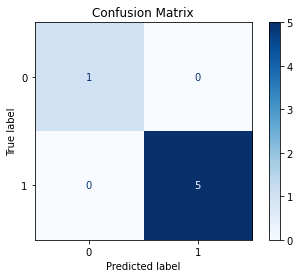

In [9]:
metrics.confusion_matrix(y_test, y_pred)
disp = metrics.plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
plt.show()

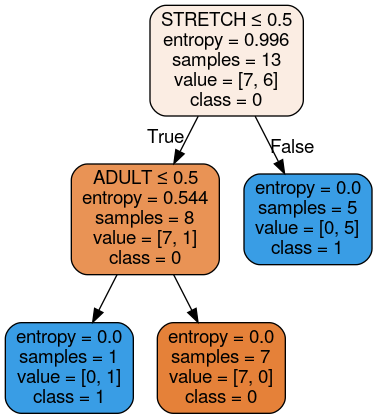

In [10]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data_columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('diabetes.png')
Image(graph.create_png())

## Conclusión

1) Para un caso tan simple, hacerlo por método bayesiano o por arboles de decisión da lo mismo, ambos dan un 100% de certeza en el sus resultados.

2) En este caso, la profundidad el maximo (2) es la produndidad optima.

3) Para este caso, no hay diferencia entre utilizar el metodo de ganancia o gini.